In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('지하철_시간대별_인원정보(위치정보_최종).csv', encoding='cp949')
df

,Unnamed: 0,사용월,호선명,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,lat,lng
0,0,201812,01호선,동대문,12351,26881,29182,39400,34293,24070,37.571420,127.009745
1,1,201812,01호선,동묘앞,9730,25609,17526,39779,26478,12439,37.572627,127.016429
2,2,201812,01호선,서울,96780,212724,157731,169677,232724,137205,37.554648,126.972559
3,3,201812,01호선,시청,62827,182997,86988,83234,154545,77485,37.564718,126.977108
4,4,201812,01호선,신설동,25436,68570,39791,44388,68081,30156,37.575297,127.025087
...,...,...,...,...,...,...,...,...,...,...,...,...
28728,28728,202101,중앙선,원덕,125,291,221,426,281,128,37.468667,127.547052
28729,28729,202101,중앙선,중랑,2398,4711,3538,5209,5435,3414,37.595031,127.075876
28730,28730,202101,중앙선,지평,58,72,0,36,25,104,37.476674,127.629756
28731,28731,202101,중앙선,팔당,957,1723,2584,2399,2056,1440,37.547597,127.243749


In [5]:
import folium

In [6]:
my_loc = folium.Map(location=[37.503436601037414, 127.049771714636], zoom_start=10)
folium.Marker([df['lat'][0], df['lng'][0]], popup=folium.Popup('subway', max_width=100)).add_to(my_loc)

my_loc.save('sub_loc.html')

In [7]:
loc = [df['lat'][0], df['lng'][0]]
my_loc = folium.Map(location=[37.503436601037414, 127.049771714636], zoom_start=10)

for i in range(1000):
    next_loc = [df['lat'][i], df['lng'][i]]
    try:
        folium.Marker(next_loc, popup=folium.Popup(df['지하철역'][i], max_width=100)).add_to(my_loc)
    except:
        pass
    
my_loc.save('sub_loc.html')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
df_bar = df.iloc[:, 3:7]
df_bar

,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원
0,동대문,12351,26881,29182
1,동묘앞,9730,25609,17526
2,서울,96780,212724,157731
3,시청,62827,182997,86988
4,신설동,25436,68570,39791
...,...,...,...,...
28728,원덕,125,291,221
28729,중랑,2398,4711,3538
28730,지평,58,72,0
28731,팔당,957,1723,2584


In [12]:
df_bar['total'] = df_bar.sum(axis=1)
df_bar

C:\Users\82103\AppData\Local\Temp/ipykernel_14028/615486596.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bar['total'] = df_bar.sum(axis=1)


,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,total
0,동대문,12351,26881,29182,68414
1,동묘앞,9730,25609,17526,52865
2,서울,96780,212724,157731,467235
3,시청,62827,182997,86988,332812
4,신설동,25436,68570,39791,133797
...,...,...,...,...,...
28728,원덕,125,291,221,637
28729,중랑,2398,4711,3538,10647
28730,지평,58,72,0,130
28731,팔당,957,1723,2584,5264


In [13]:
df2 = df_bar[:100]
df2

,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,total
0,동대문,12351,26881,29182,68414
1,동묘앞,9730,25609,17526,52865
2,서울,96780,212724,157731,467235
3,시청,62827,182997,86988,332812
4,신설동,25436,68570,39791,133797
...,...,...,...,...,...
95,남태령,4031,6941,2334,13306
96,노원,13730,31522,38620,83872
97,당고개,8844,13668,13821,36333
98,동대문,37308,83170,79170,199648


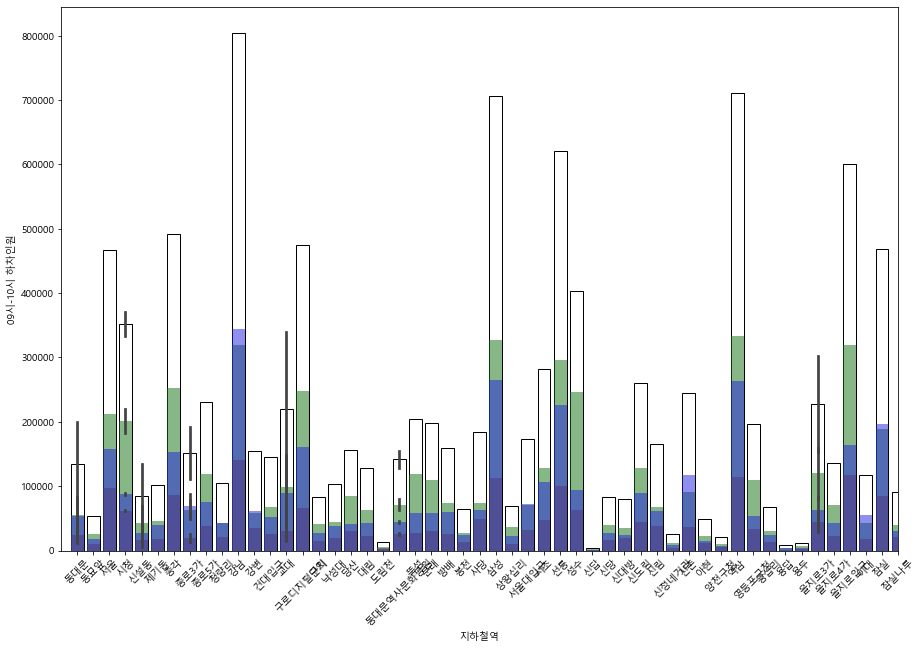

In [15]:
plt.figure(figsize=(15, 10))

# 큰 틀(막대그래프)
sns.barplot(data=df2, x='지하철역', y='total', facecolor='w', edgecolor='black')

# x축 기울기 지정
plt.xticks(rotation = 45 )
# 값(선 그래프)

try:
    sns.barplot(data=df2, x='지하철역', y='07시-08시 하차인원', alpha=0.5, color='r', label='07시-08시 하차인원')
    sns.barplot(data=df2, x='지하철역', y='08시-09시 하차인원', alpha=0.5, color='g', label='08시-09시 하차인원')
    sns.barplot(data=df2, x='지하철역', y='09시-10시 하차인원', alpha=0.5, color='b', label='09시-10시 하차인원')
except:
    pass
    
plt.xlim(-1, 51)
# plt.show()
plt.savefig('barplot.png')